In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
#import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import numpy as np

In [2]:
# Label of the atom 
rest_label="R$_1$"



vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,75,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","75","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=100


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"



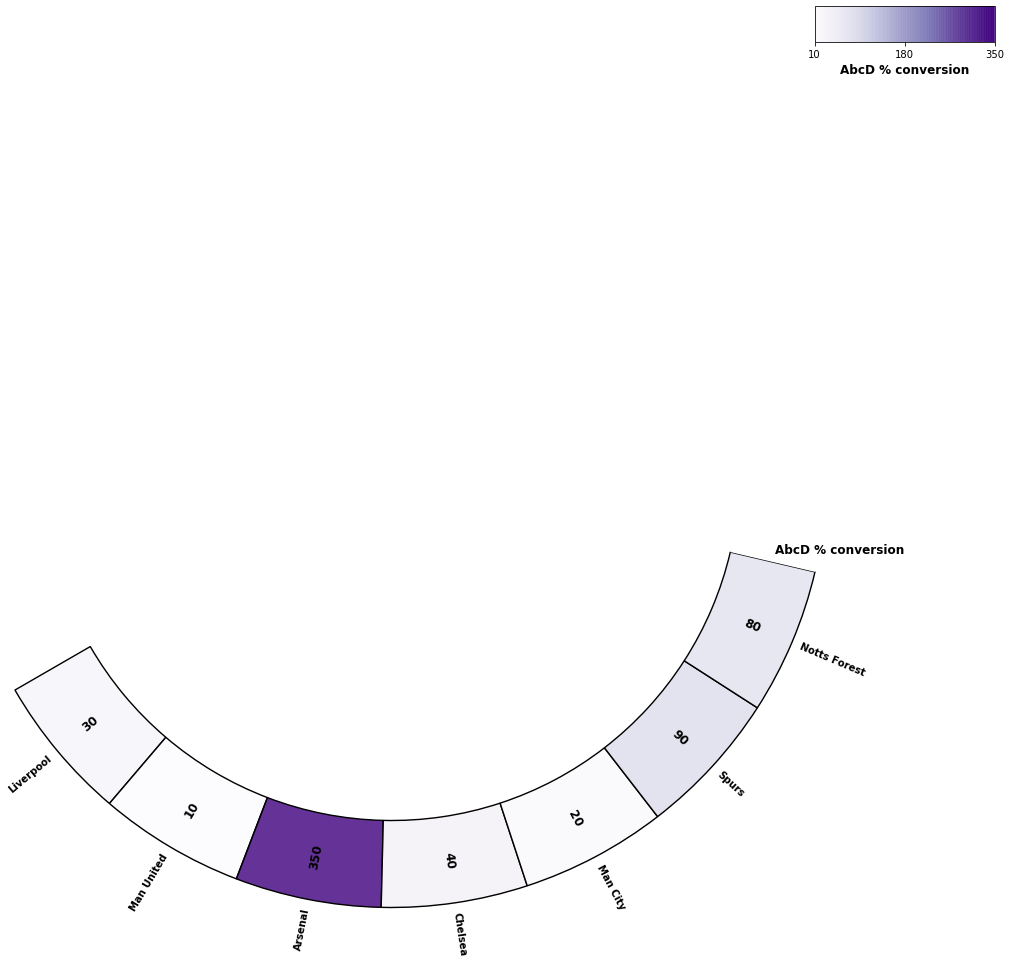

In [110]:
import matplotlib as mpl


# Just look at outer circle
fig, ax = plt.subplots(figsize=(10,10))


alpha = 0.8

wedge_percent = 0.38
startang = -150
legend_gap = 1.15

col_values = [30, 10, 350, 40, 20, 90, 80]

slice_labels = ["Liverpool","Man United","Arsenal","Chelsea","Man City","Spurs", "Notts Forest"]



slices = len(col_values)

pie_values = [wedge_percent/slices]*slices

vmin=min(col_values)
vmax=max(col_values)




radius = 2
width = 0.4

label_nudge = 0.02


outer_labels = ax.pie(pie_values, 
                    radius=radius,
                    startangle=startang, 
                    colors=['w']*slices, 
                    labels=slice_labels,
                    labeldistance=1 + label_nudge,
                    rotatelabels=True,
                    textprops=dict(fontsize='medium',
                                   weight="semibold",
                                   va='center', 
                                   wrap=True))

# Set correct ha for all wedge angles

slice_angle = 360*wedge_percent/slices

for i, s in enumerate(outer_labels[1]):
    angle = startang + (i+0.5)*slice_angle
    if -90 <= angle <= 90:
        s.set_ha('left')
    else:
        s.set_ha('right')


#outer_labels[1][4].set_ha('right')



# Do the wedges
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = ScalarMappable(norm=norm, cmap="Purples")

labels = [str(c) for c in col_values] 


width = min(width, radius)
label_distance = (radius - width/2)/radius

outer_circle=ax.pie(pie_values, 
                    radius=radius,
                    startangle=startang, 
                    colors=mapper.to_rgba(col_values, alpha=alpha), 
                    labels=labels, 
                    rotatelabels=True,
                    labeldistance=label_distance,
                    wedgeprops=dict(width=width, 
                                    edgecolor='k',linewidth= 1.4),
                    textprops=dict(fontsize='large',weight="semibold",
                                   va='center', ha='center',wrap=True))

# outer_circle[0][-1].set_color('w')
# #outer_circle[0][-2].set_width(width)
# outer_circle[1][-1].set_rotation(False)
# outer_circle[1][-1].set_ha('right')

legend_x_start = 0.1
legend_y_start = 0.1

ax2cmap2 = plt.axes([1+legend_x_start, 1+legend_y_start, 0.25, 0.05])

ticks = [vmin, int((vmin+vmax)/2), vmax]
tick_labels = [str(l) for l in ticks]

cbar1 = plt.colorbar(mapper,cax=ax2cmap2, orientation="horizontal",ticks=ticks, alpha=alpha)
cbar1.ax.set_xticklabels(tick_labels) 

cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)

ring_label = ax.pie([0.01], 
                    radius=radius,
                    startangle=startang+ 360*wedge_percent, 
                    colors='w', 
                    labels=[OUTERLABEL], 
                    rotatelabels=False,
                    labeldistance=label_distance,
                    wedgeprops=dict(width=width),
                    textprops=dict(fontsize='large',weight="semibold",
                                   va='center', ha='left',wrap=True))


In [4]:
print(vals[0])
print(vals[2])
print(vals[4])

[80, 10.0, 10, 10, 10, 10, 10]
[0, 1, 21, 40, 99, 50, 60]
['', '1', '21', '40', '>99', '50', '60']


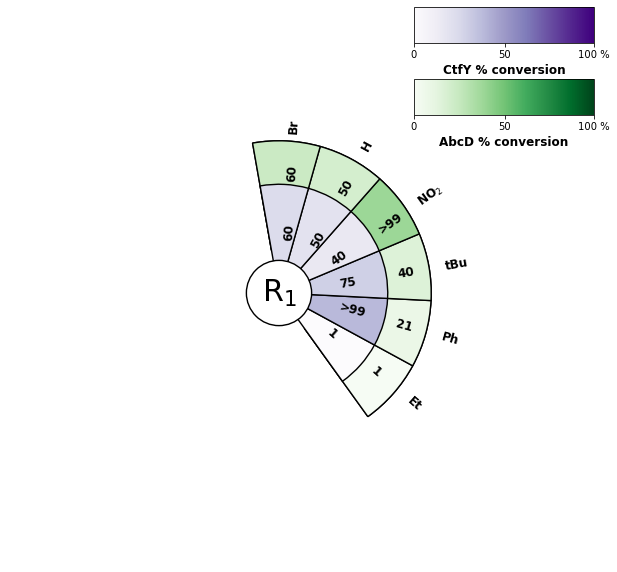

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

ax2cmap1 = plt.axes([0.70, 0.85, 0.25, 0.05])
ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])
size = 0.5
alpha = 0
which_wedge = 0

circle1 = plt.Circle((0, 0), 0.15, color='w', ls='-', ec='k', lw=1.4)


label = ax.annotate(rest_label, xy=(0, 0), fontsize=30, ha="center", va='center')

cmap_inner = plt.get_cmap(CMAPINNER)
cmap_outer = plt.get_cmap(CMAPOUTER)
inner_colors = cmap_inner(vals[1])
outer_colors = cmap_outer(vals[2])


labels_circle=ax.pie(vals[0], startangle=startangle, radius=0.7, colors=['w']*len(vals[0]), labels=vals[5], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )


outer_circle=ax.pie(vals[0], radius=0.7,startangle=startangle, colors=outer_colors, labels=vals[3], rotatelabels=True,labeldistance=0.4,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4),textprops=dict(fontsize='large',weight="semibold",va='center'))

inner_circle=ax.pie(vals[0], startangle=startangle, radius=1-size, colors=inner_colors, labels=vals[4], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )



inner_circle[0][which_wedge].set_alpha(alpha)
outer_circle[0][which_wedge].set_alpha(alpha)
labels_circle[0][which_wedge].set_alpha(alpha)

sm = ScalarMappable(cmap=cmap_inner, norm=plt.Normalize(0,max(vals[1])))
sm.set_array([])
cbar = plt.colorbar(sm,cax=ax2cmap1, orientation="horizontal",ticks=[0,50,99])
cbar.ax.set_xticklabels(['0', '50', '100 %']) 
cbar.set_label(INNERLABEL,weight='bold', fontsize=12)

sm1 = ScalarMappable(cmap=cmap_outer, norm=plt.Normalize(0,max(vals[1])))
sm1.set_array([])
cbar1 = plt.colorbar(sm1,cax=ax2cmap2, orientation="horizontal",ticks=[0,50,99])
cbar1.ax.set_xticklabels(['0', '50', '100 %']) 
cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)


ax.add_artist(circle1)
ax.set(aspect="equal")
plt.show()

### CHANGE NAME IF YOU NEED A SECOND REST
#fig.savefig('R1.svg', transparent=True)

In [6]:
import pandas as pd

        

In [7]:
def wedge_defaults(num_wedges):
    defaults = {
         1:{
    'colours': ["Purples"],
    'radius': [0.5],
    'wedge_width': [0.3],
    'wedge_labels': None,
    },
        2:{
    'colours': ["Purples", "Greens"],
    'radius': [0.5, 0.7],
    'wedge_width': [0.3, 0.2],
    'wedge_labels': None,
    },
         3:{
    'colours': ["Purples", "Greens", "OrRd" ],
    'radius': [0.5, 0.7, 0.9],
    'wedge_width': [0.3, 0.2, 0.2],
    'wedge_labels': None,
    },
        4: {
    'colours': ["Purples", "Greens", "OrRd", "Blues" ],
    'radius': [0.5, 0.7, 0.9, 1.1],
    'wedge_width': [0.3, 0.2, 0.2, 0.2],
    'wedge_labels': None,
    },
        5: {
    'colours': ["Purples", "Greens", "OrRd", "Blues", "RdPu" ],
    'radius': [0.5, 0.7, 0.9, 1.1, 1.3],
    'wedge_width': [0.3, 0.2, 0.2, 0.2, 0.2],
    'wedge_labels': None,
    },
    }
    try:
        return defaults[num_wedges]
    except KeyError:
        return {
            'colours': None,
            'radius': None,
            'wedge_width': None,
            'wedge_labels': None,
        }

In [231]:
def default_legend_tick(values, round_to=1):
    def round_to(x, base=round_to):
        return base * round(x/base)
    minv = min(values)
    maxv = max(values)
    ticks = [minv, round_to((minv + maxv)/2) ,maxv]

    tick_labels = [str(round_to(l)) for l in ticks]

    return ticks, tick_labels

def default_label_format(c):
    return str(c)



def pie_wedges(df, ring_values=None, slice_labels=None, colours=None,
        radius=None,
        wedge_width=None,
        legend_units=None,
        startangle=-30, 
        all_slices_percent=0.43,
        figsize=(10,10),
        coloralpha=0,
        edgecolour='k',
        linewidth=1.4,
        label_fontsize='large',
        label_fontweight='semibold',
        blankcolour='w',
        ls='-',
        circle_label='',
        circle_fontsize= 30,
        circle_ha='center',
        circle_va='center',
        legend_orientation= 'horizontal',
        legend_fontweight= 'bold',
        legend_fontsize= 12,
        legend_fontstyle='normal',
        legend_boxheight= 0.05,
        legend_boxwidth= 0.25,
        legend_tickvalues= default_legend_tick,
        wedge_label_format= default_label_format,
        hide_wedge_label= False,
        hide_slice_label= False,
        hide_legend=False,
        slice_label_nudge=0.02,
        slice_label_rotate=True,
        wedge_label_rotate=True,
        alpha=1,
        legend_x_start = 0.1,
        legend_y_start = -0.1,
        legend_gap=0.1,
        legend_label_round_to=1,
        hide_ring_label=True,
        title=None,
        title_x=0,
        title_y=.98,
        title_fontsize='xx-large',
        title_fontweight='bold'):
    """
    Help on functions
    """
    # A slice is a row of data across all columns
    #     A single triangular pizza slice
    # A wedge is a single row and single column 
    #     A portion of a slice
    # A ring is a column of data
    #     Wedges from each slice in the same layer
    
    if ring_values is None:
        ring_values = df.columns.tolist()
    if slice_labels is None:
        slice_labels = df.index.tolist()
    else:
        slice_labels = df[slice_labels].tolist()
        
    num_slices = df.shape[0]
    num_wedges = len(ring_values)
    
    # Gather all wedges parameters together and update
    # the defaults
    wedge_params = {
    'colours': colours,
    'radius': radius,
    'wedge_width': wedge_width,
    'legend_labels': slice_labels,
    }
    wedge_params = {k:v for k,v in wedge_params.items() if v is not None}
    wedges = wedge_defaults(num_wedges)
    wedges.update(wedge_params)    
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Replace any None values with the column name of ring_values
    if wedges['wedge_labels'] is None:
        wedges['wedge_labels'] = ring_values.copy()

    circle_radius = wedges['radius'][0] - wedges['wedge_width'][0]
    
    # centre circle first
    centre_circle = plt.Circle((0, 0),
                               circle_radius, 
                               color=blankcolour, 
                               ls=ls, 
                               ec=edgecolour, 
                               lw=linewidth)
    centre_label = ax.annotate(circle_label, 
                               xy=(0, 0), 
                               fontsize=circle_fontsize, 
                               ha=circle_ha, 
                               va=circle_va)
    ax.add_artist(centre_circle)
    
    # Add each wedge from outer to inner for each slice of data
    slice_sizes = [all_slices_percent/num_slices]*num_slices
    
    # add the outer labels first
    if not hide_slice_label:
        labels = slice_labels
        outer_labels = ax.pie(slice_sizes, 
                    radius=wedges['radius'][-1],
                    startangle=startangle, 
                    colors=[blankcolour]*slices, 
                    labels=labels,
                    labeldistance=1 + slice_label_nudge,
                    rotatelabels=slice_label_rotate,
                    textprops=dict(fontsize=label_fontsize, 
                                   weight=label_fontweight,
                                   va='center', 
                                   wrap=True))
                                   
        # Set correct label ha for all wedge angles
        slice_angle = 360*all_slices_percent/num_slices

        for i, s in enumerate(outer_labels[1]):
            angle = startangle + (i+0.5)*slice_angle
            if -90 <= angle <= 90:
                s.set_ha('left')
            else:
                s.set_ha('right')
    
    # build rings from ouside in
    ring_values.reverse()       
    for idx, ring in enumerate(ring_values):
        idx = num_wedges - idx - 1
        ring_values = df[ring].tolist()
        vmin=min(ring_values)
        vmax=max(ring_values)
        
        # run a custom function to format the labels
        labels = [wedge_label_format(c) for c in ring_values]
        if hide_wedge_label:
            labels = [''] * num_slices
        
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = ScalarMappable(norm=norm, cmap=wedges['colours'][idx])
        
        radius = wedges['radius'][idx]
        width = min(wedges['wedge_width'][idx], radius)
        label_distance = (radius - width/2)/radius

        layer = ax.pie(slice_sizes, 
                            radius=radius,
                            startangle=startangle, 
                            colors=mapper.to_rgba(ring_values, alpha=alpha), 
                            labels=labels, 
                            rotatelabels=wedge_label_rotate,
                            labeldistance=label_distance,
                            wedgeprops=dict(width=width, 
                                            edgecolor=edgecolour,linewidth= linewidth),
                            textprops=dict(fontsize=label_fontsize,weight=label_fontweight,
                                           va='center', ha='center',wrap=True))
                            
        # Place the legend
        if not hide_legend:
            axcmap = plt.axes([1+legend_x_start, 1+legend_y_start-idx*legend_gap, 
                                 legend_boxwidth,legend_boxheight])
            
            ticks, tick_labels = default_legend_tick(ring_values, round_to=legend_label_round_to)
            
            if legend_units is not None:
                if type(legend_units)==str:
                    unit_label = legend_units
                else:
                    unit_label = legend_units[idx]
                tick_labels[-1] = '{} {}'.format(tick_labels[-1], unit_label)

            cbar = plt.colorbar(mapper,cax=axcmap, orientation="horizontal",ticks=ticks, alpha=alpha)
            cbar.ax.set_xticklabels(tick_labels) 

            cbar.set_label(wedges['wedge_labels'][idx],
                           weight=legend_fontweight, 
                           fontsize=legend_fontsize, fontstyle=legend_fontstyle)
        
        # Place the legend label on the ring
        if not hide_ring_label:
            ring_label_angle = startangle + 360*all_slices_percent
            if -180 <=ring_label_angle <= 0:
                ring_label_just = 'left'
            else:
                ring_label_just = 'right'
            ring_label = ax.pie([0.01], 
                    radius=radius,
                    startangle=ring_label_angle, 
                    colors='w', 
                    labels=[wedges['wedge_labels'][idx]], 
                    rotatelabels=False,
                    labeldistance=label_distance,
                    wedgeprops=dict(width=width),
                    textprops=dict(fontsize=legend_fontsize,weight=legend_fontweight,
                                   fontstyle=legend_fontstyle,
                                   va='center', ha=ring_label_just,wrap=True))

                            
                
    ax.set(aspect="equal")
    if title is not None:
        fig.suptitle(title, x=title_x, y=title_y, fontsize=title_fontsize,
                     fontweight=title_fontweight)
    
    return fig, ax


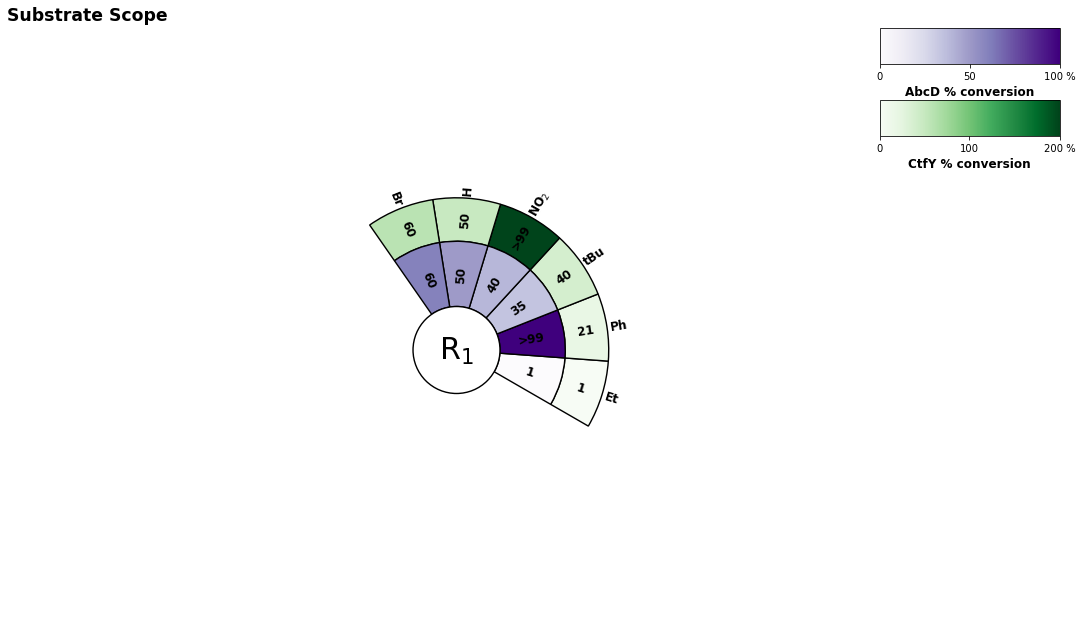

In [233]:


df = pd.DataFrame({
    'AbcD % conversion': [1,99,35,40,50,60],
    'CtfY % conversion': [1,21,40,200,50,60],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br"]
})
wedges = {
    'colours': ["Purples", "Greens"],
    'radius': [0.5, 0.7],
    'label_distance': [0.55, 0.8],
    'legend_labels': ["AbcD % conversion", "CtfY % conversion"],
    'legend_coord': [[0.70, 0.85], [0.70, 0.75]],
    'circle_label': "R$_1$",
    'slice_label_distance': 1.1,
}

def lab_format(c):
    if c==0:
        return ''
    if c>=99:
        return '>99'
    return str(c)

f, a = pie_wedges(df, ["AbcD % conversion", "CtfY % conversion"], 'label',  
           circle_label="R$_1$",legend_units='%', legend_label_round_to=5, 
                  wedge_label_format=lab_format, startangle=-30, title='Substrate Scope')



In [234]:
print(f)

Figure(720x720)


In [235]:
help(pie_wedges)

Help on function pie_wedges in module __main__:

pie_wedges(df, ring_values=None, slice_labels=None, colours=None, radius=None, wedge_width=None, legend_units=None, startangle=-30, all_slices_percent=0.43, figsize=(10, 10), coloralpha=0, edgecolour='k', linewidth=1.4, label_fontsize='large', label_fontweight='semibold', blankcolour='w', ls='-', circle_label='', circle_fontsize=30, circle_ha='center', circle_va='center', legend_orientation='horizontal', legend_fontweight='bold', legend_fontsize=12, legend_fontstyle='normal', legend_boxheight=0.05, legend_boxwidth=0.25, legend_tickvalues=<function default_legend_tick at 0x7fdf4b6fca60>, wedge_label_format=<function default_label_format at 0x7fdf4b6fc7b8>, hide_wedge_label=False, hide_slice_label=False, hide_legend=False, slice_label_nudge=0.02, slice_label_rotate=True, wedge_label_rotate=True, alpha=1, legend_x_start=0.1, legend_y_start=-0.1, legend_gap=0.1, legend_label_round_to=1, hide_ring_label=True, title=None, title_x=0, title_y=0.

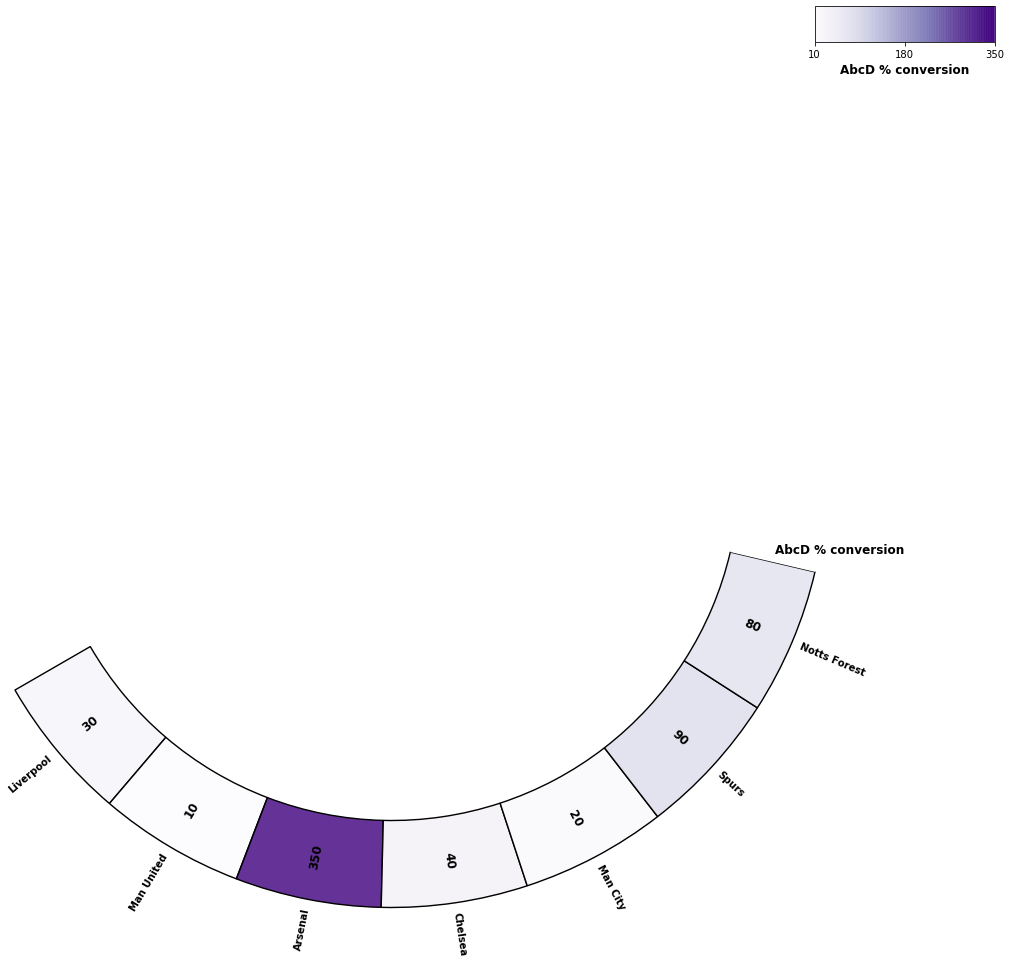

In [236]:
fig

(<Figure size 720x720 with 4 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf4b4b7278>)

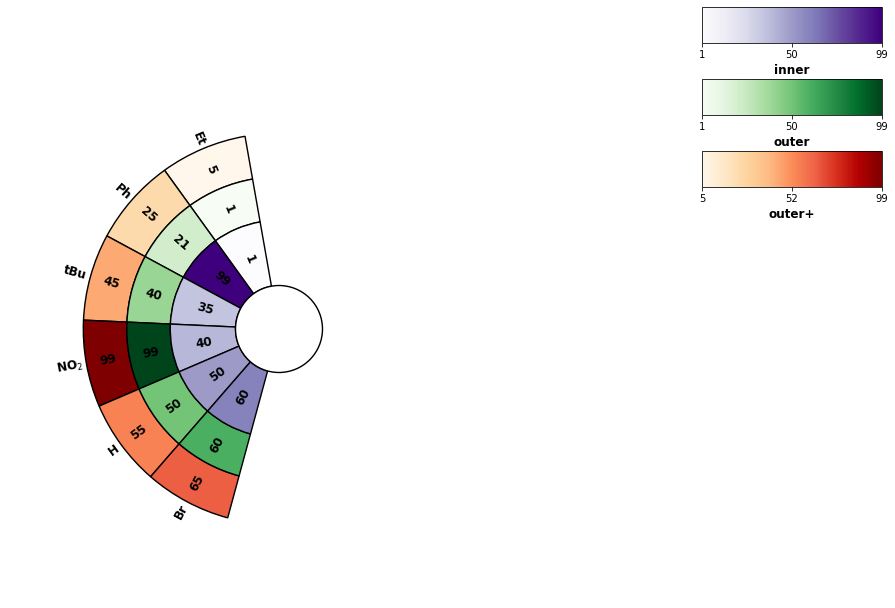

In [237]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60],
    'outer': [1,21,40,99,50,60],
    'outer+': [5,25,45,99,55,65],
    
    'label': ["Et","Ph","tBu","NO$_2$","H","Br"]
})



pie_wedges(df, ['inner', 'outer', 'outer+'], 'label',  startangle=100, all_slices_percent=0.43)



(<Figure size 720x720 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf4b30b710>)

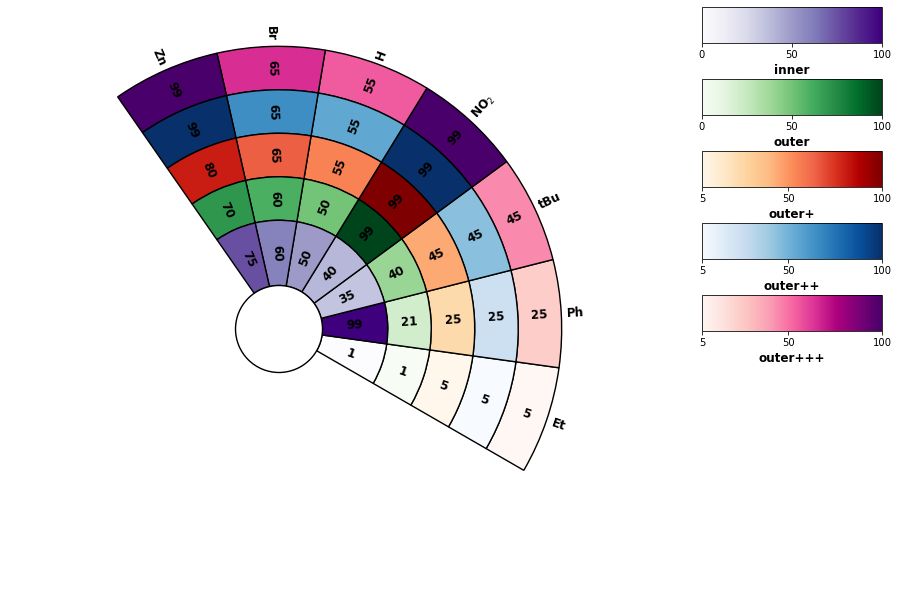

In [238]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60, 75],
    'outer': [1,21,40,99,50,60, 70],
    'outer+': [5,25,45,99,55,65, 80],
    'outer++': [5,25,45,99,55,65, 99],
    'outer+++': [5,25,45,99,55,65, 99],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br", 'Zn']
})



pie_wedges(df, ['inner', 'outer', 'outer+', 'outer++', 'outer+++'], 'label', legend_label_round_to=5)

(<Figure size 720x720 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf4b1399b0>)

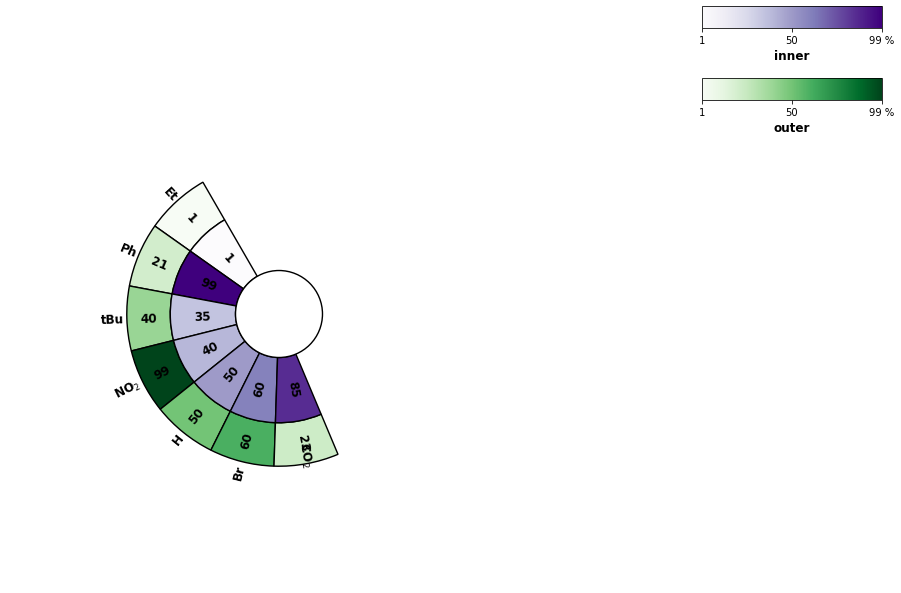

In [239]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60, 85],
    'outer': [1,21,40,99,50,60, 23],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br", "CO$_2$"]
})



pie_wedges(df, ['inner', 'outer'], 'label',  startangle=120, all_slices_percent=0.48,
          legend_fontsize=12, legend_units='%', legend_boxheight=0.03)

In [240]:
df = pd.DataFrame({
    'League Cup': [8,5,2,5,6,4,4],
    'FA Cup': [7,12,13,8,6,8,2],
    'League Champions':[18,20,13,6,6,2,1],
    'UEFA Cup': [3,0,0,0,0,2,0],
    'European Cup':[6,3,0,1,0,0,2],
})
df.index=["Liverpool","Man United","Arsenal","Chelsea","Man City","Spurs", "Notts F"]

df

,League Cup,FA Cup,League Champions,UEFA Cup,European Cup
Liverpool,8,7,18,3,6
Man United,5,12,20,0,3
Arsenal,2,13,13,0,0
Chelsea,5,8,6,0,1
Man City,6,6,6,0,0
Spurs,4,8,2,2,0
Notts F,4,2,1,0,2


(<Figure size 720x720 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf4adece48>)

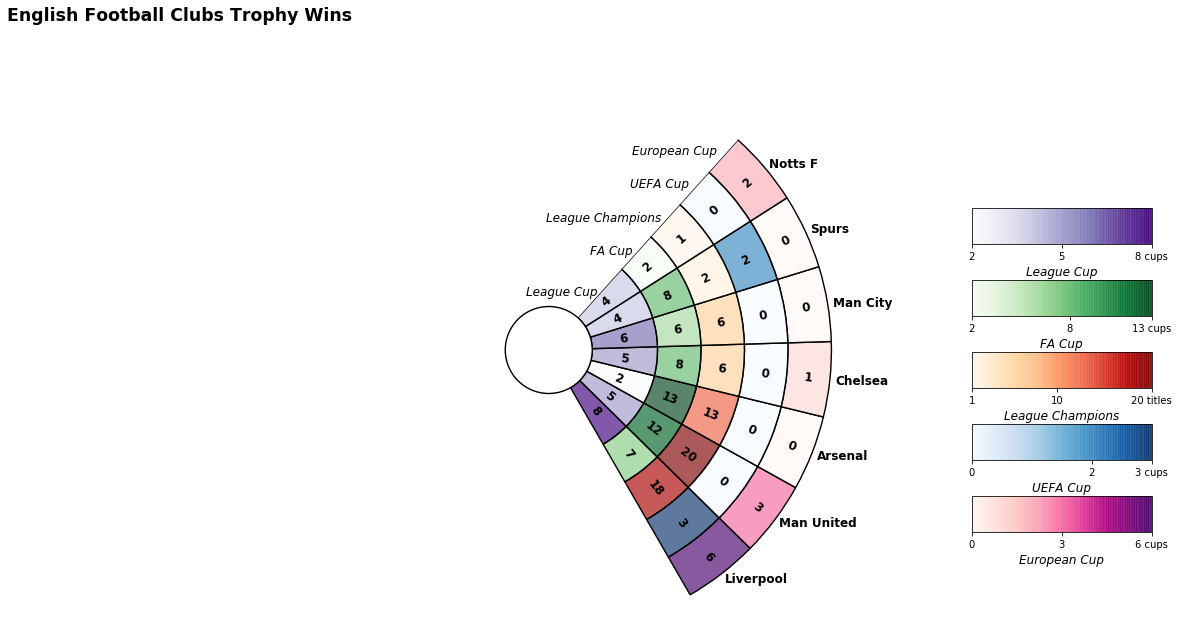

In [242]:
pie_wedges(df,  startangle=-60, all_slices_percent=0.30,alpha=.65, legend_y_start=-.35, 
           hide_ring_label=False, slice_label_rotate=False, legend_fontstyle='italic', legend_fontweight='normal',
          legend_units=['cups','cups','titles','cups','cups',],
          title='English Football Clubs Trophy Wins')